<a href="https://colab.research.google.com/github/shivi123git/-Handwritten-Number-Recognition/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #libraries  then other datasets available that provide us the examples we need to teach the machine
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
train_data = datasets.MNIST( #where  you download the datasets, go to internet and then download into a folder called data
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
#you can use the same code but use different datasets with pictures
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

loaders = {
    'train': DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    ),

    'test': DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    )
}

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 22.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 644kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.68MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.47MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
class CNN(nn.Module): #convulsional neural network : filter that goes over picture to extract certain details --> goes to every single picture and look at a number and identify all its patterns/lines/curves from all examples,
    #we write a class (group of functions), read all images and find patterns

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #kernel size: 5 by 5 box --> larger the kernel, the more detailed
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()    #all of these settings makes it deeper and more details --> this creates higher accuracy
        self.fc1 = nn.Linear(320, 50)  #the deeper the network, the more neurons the machine will have
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch): #training process: slowest part
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)")


for epoch in range(1, 11):
    train(epoch)
    test()

<ipython-input-4-79c0fb43b5ab>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.303108
Train Epoch: 1 [2000/60000 (3%)]	2.292573
Train Epoch: 1 [4000/60000 (7%)]	2.237589
Train Epoch: 1 [6000/60000 (10%)]	2.048379
Train Epoch: 1 [8000/60000 (13%)]	1.826895
Train Epoch: 1 [10000/60000 (17%)]	1.781853
Train Epoch: 1 [12000/60000 (20%)]	1.791076
Train Epoch: 1 [14000/60000 (23%)]	1.738614
Train Epoch: 1 [16000/60000 (27%)]	1.783755
Train Epoch: 1 [18000/60000 (30%)]	1.647878
Train Epoch: 1 [20000/60000 (33%)]	1.699991
Train Epoch: 1 [22000/60000 (37%)]	1.687972
Train Epoch: 1 [24000/60000 (40%)]	1.625262
Train Epoch: 1 [26000/60000 (43%)]	1.612355
Train Epoch: 1 [28000/60000 (47%)]	1.653500
Train Epoch: 1 [30000/60000 (50%)]	1.601785
Train Epoch: 1 [32000/60000 (53%)]	1.626933
Train Epoch: 1 [34000/60000 (57%)]	1.649517
Train Epoch: 1 [36000/60000 (60%)]	1.623615
Train Epoch: 1 [38000/60000 (63%)]	1.649185
Train Epoch: 1 [40000/60000 (67%)]	1.576519
Train Epoch: 1 [42000/60000 (70%)]	1.604752
Train Epoch: 1 [44000/60000 (73%)]	1.579579

Prediction: 2


<ipython-input-4-e1413807968d>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


<function matplotlib.pyplot.show(close=None, block=None)>

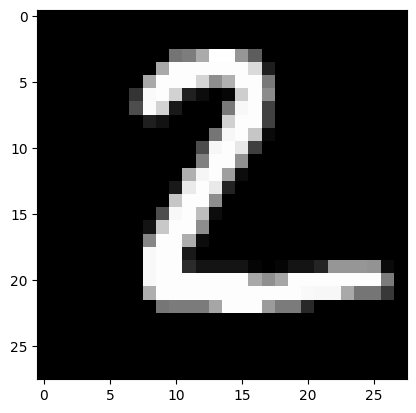

In [ ]:
model.eval()

data, target = test_data[1] #can change the number for different examples

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show

Prediction: 8


<ipython-input-4-e1413807968d>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


<function matplotlib.pyplot.show(close=None, block=None)>

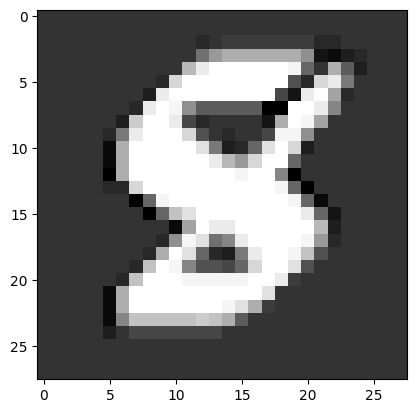

In [ ]:
model.eval()

img = cv2.imread('Examples/8.png',cv2.IMREAD_GRAYSCALE)  #Read the image as a grayscale
resized = cv2.resize(img, (28,28))  #Resize the data to the MNIST dimensions
features = resized.reshape(1, 28, 28) #Get the image in the form of an array

data = torch.tensor(features)

data = data.unsqueeze(0).to(device)

data = data.float()

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show